In [4]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
file = '../database/publication_database.csv'
images = '../publication_images'
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
import matplotlib.cm as cm

ecdatabase = database.Database(file)
ecdatabase.create_isotropic_models()
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('plagioclase')
model_names

['yang_11a_plag',
 'yang_12b_plag[100]',
 'yang_12b_plag[010]',
 'yang_12b_plag[001]',
 'Li_18_dry_plag',
 'Li_18_wet_plag',
 'isotropic_model:yang_12b_plag[100]+yang_12b_plag[010]+yang_12b_plag[001]']

# Exploring Pyrrhenious's Plagioclaise Models Database Correspondence

Here we look at Plagioclaise models parameterization correspondence of:

 * Yang X. et al., 2011. Electrical conductivity of orthopyroxene and plagioclase in the lower crust
  
 * Xioazhi Yang 2012. Orientation-related electrical conductivity of hydrous olivine, clinopyroxene and plagioclase and implications for the structure of the lower continental crust and uppermost mantle
 
  * Li et al. 2018. Electrical conductivity of the plagioclase–NaCl–water system and its implication for the high conductivity anomalies in the mid-lower crust of Tibet Plateau
 


## Yang X. et al., 2011

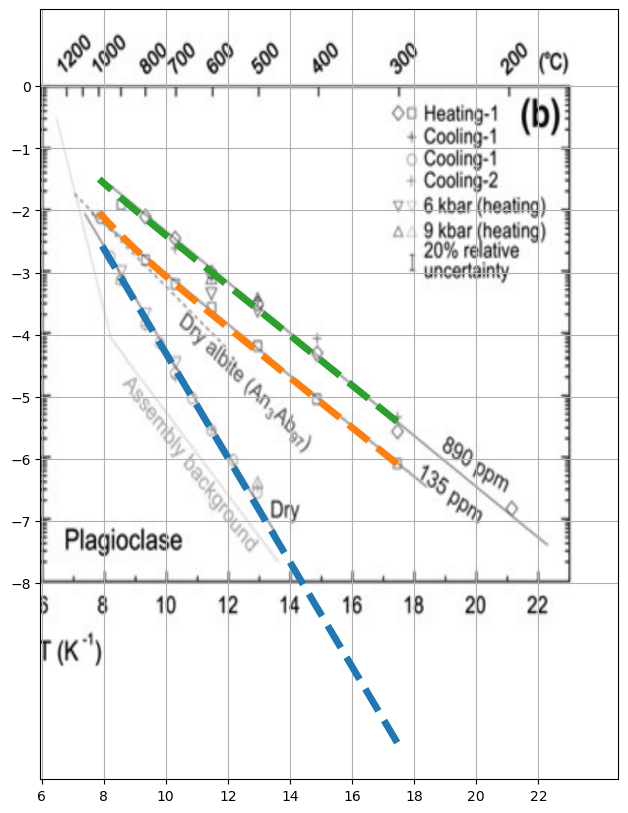

In [5]:
model = 'yang_11a_plag'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==1:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for water in [0,135,890]:
        conductivity = model.get_conductivity(T=temperature_range,Cw=water)
        ax.plot(1e4/temperature_range,np.log10(conductivity),linestyle='--',linewidth=5)
    


## Yang X. 2012

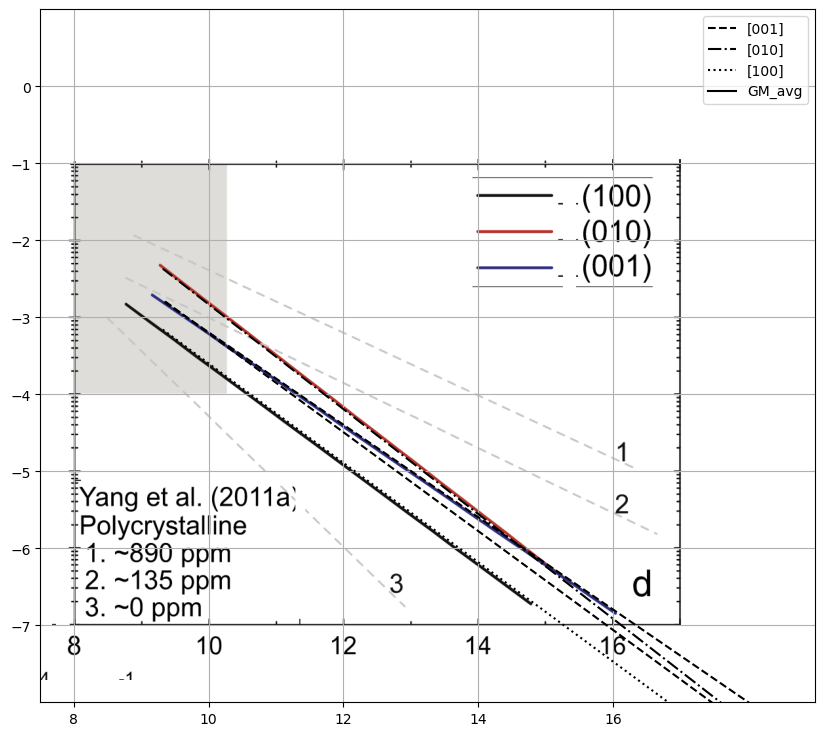

In [7]:
model = 'yang_12b_plag[100]'
water =[0,135,890]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(ec_model_row['temp_min']-50,ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i!=0:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model_name in ['yang_12b_plag[100]',
 'yang_12b_plag[010]',
 'yang_12b_plag[001]',
 'isotropic_model:yang_12b_plag[100]+yang_12b_plag[010]+yang_12b_plag[001]']:
        ecmodel = ecdatabase.get_model(model_name)
        if '001' in model_name:
            linestyle='--'
        elif '010' in model_name:
            linestyle='-.'
        elif '100' in model_name:
            linestyle=':'
        elif 'aniso' in model_name:
            linestyle='-'
        c = ecmodel.get_conductivity(T=temperature_range)
        ax.plot(1e4/temperature_range,
        np.log10(c),linestyle=linestyle,color='black')

plt.plot([],[],linestyle='--',label='[001]',color='black')
plt.plot([],[],linestyle='-.',label='[010]',color='black')

plt.plot([],[],linestyle=':',label='[100]',color='black')
plt.plot([],[],linestyle='-',label='GM_avg',color='black')
        
plt.xlim([7.5,19])
plt.ylim([-8,1])
plt.legend()

## Li et al., 2018

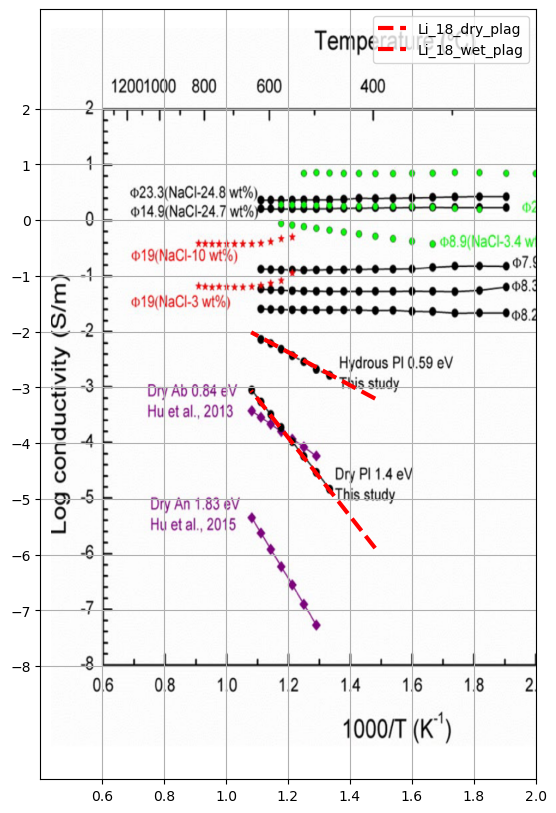

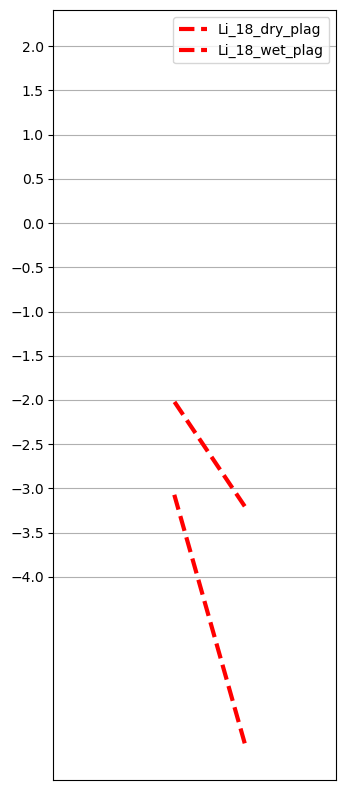

In [8]:
ec_model_row = ecdatabase.get_model_properties('Li_18_dry_plag')
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(ec_model_row['temp_min']-50,ec_model_row['temp_max'],num=100,dtype=float).ravel()
ecmodel = ecdatabase.get_model('Li_18_dry_plag')
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model in ['Li_18_dry_plag','Li_18_wet_plag',]:
        ecmodel = ecdatabase.get_model(model)

        c1 = ecmodel.get_conductivity(T=temperature_range)
        ax.plot(1e3/temperature_range,np.log10(c1),linestyle=linestyle,
                    linewidth=3,color='red',label=model)
            
    plt.xlim([0.4,2])
    plt.legend(ncol=1)